# Credit Card Transactions

## Goal

One of the greatest challenges in fraud, and in general in that area of data science related to catching illegal activities, is that you often find yourself one step behind.

Your model is trained on past data. If users come up with a totally new way to commit a fraud, it often takes you some time to be able to react. By the time you get data about that new technique and retrain the model, many frauds have been committed.

A way to overcome this is to use unsupervised machine learning, instead of supervised. In this case, you don’t need to have examples of certain fraud patterns in order to make a prediction. Often this works by looking at the data and identify sudden clusters of unusual activities.

This is the goal of this challenge. You have a dataset of credit card transactions and you have to identify unusual/weird events that have high chance of being a fraud.


## Challenge Description

Company XYZ is a major credit card company. It has all information about transactions that users make with their credit card.

Your boss wants to implement the following products and needs your help.

Your boss wants to identify those users that in the your data set never went above the monthly credit card limit. The goal of this is to automatically increase their limit. Can you send him the list of Ids?


On the other hand, he wants to implement an algorithm that as soon as a user goes above her monthly limit, it triggers an alert so that the user can be notified about that. Build a function that for each day, returns a list of users who went above their credit card monthly limit on that day.


Finally, your boss is very concerned about frauds cause they are a huge cost for credit card companies. He wants to implement an unsupervised algorithm for the reasons we discussed above.
Build a model that returns all transactions that seem unusual and are worth being investigated further.




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ls

10_Credit_Card_Transactions.ipynb  transactions.csv
cc_info.csv


In [3]:
df_cc = pd.read_csv('cc_info.csv')
df_cc.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [4]:
df_trans = pd.read_csv('transactions.csv')
df_trans.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [5]:
print(df_cc.shape)
print(df_trans.shape)

(984, 5)
(294588, 5)


In [6]:
df_cc.isnull().sum()

credit_card          0
city                 0
state                0
zipcode              0
credit_card_limit    0
dtype: int64

In [7]:
df_trans.isnull().sum()

credit_card                  0
date                         0
transaction_dollar_amount    0
Long                         0
Lat                          0
dtype: int64

In [8]:
df_trans.dtypes

credit_card                    int64
date                          object
transaction_dollar_amount    float64
Long                         float64
Lat                          float64
dtype: object

In [9]:
df_trans.date = pd.to_datetime(df_trans.date)

In [10]:
df_trans.dtypes

credit_card                           int64
date                         datetime64[ns]
transaction_dollar_amount           float64
Long                                float64
Lat                                 float64
dtype: object

## Question I

Your boss wants to identify those users that in the your data set never went above the monthly credit card limit. The goal of this is to automatically increase their limit. Can you send him the list of Ids?

In [11]:
df_combine = pd.merge(df_cc, df_trans, how ='left', on = 'credit_card')
df_combine = df_combine.sort_values(['credit_card','date']).reset_index(drop=True)
df_combine.head(10)

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,Houston,PA,15342,20000,2015-07-31 20:03:05,45.52,-80.186336,40.168399
1,1003715054175576,Houston,PA,15342,20000,2015-07-31 20:25:28,96.10,-80.156132,40.222907
2,1003715054175576,Houston,PA,15342,20000,2015-07-31 23:09:32,20.94,-80.262219,40.242532
3,1003715054175576,Houston,PA,15342,20000,2015-08-01 10:48:03,51.27,-80.176899,40.313324
4,1003715054175576,Houston,PA,15342,20000,2015-08-01 17:43:43,127.99,-80.226671,40.295995
5,1003715054175576,Houston,PA,15342,20000,2015-08-01 17:44:19,96.97,-80.144866,40.286490
6,1003715054175576,Houston,PA,15342,20000,2015-08-01 19:10:09,97.35,-80.163659,40.203355
7,1003715054175576,Houston,PA,15342,20000,2015-08-02 19:39:29,131.43,-80.217836,40.224044
8,1003715054175576,Houston,PA,15342,20000,2015-08-02 22:40:59,85.74,-80.244574,40.255371
9,1003715054175576,Houston,PA,15342,20000,2015-08-03 00:27:43,80.67,-80.238467,40.225008


In [12]:
card_list = list(df_cc.credit_card.unique())

In [13]:
df_combine['month'] = df_combine.date.dt.month
df_combine.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,month
0,1003715054175576,Houston,PA,15342,20000,2015-07-31 20:03:05,45.52,-80.186336,40.168399,7
1,1003715054175576,Houston,PA,15342,20000,2015-07-31 20:25:28,96.10,-80.156132,40.222907,7
2,1003715054175576,Houston,PA,15342,20000,2015-07-31 23:09:32,20.94,-80.262219,40.242532,7
3,1003715054175576,Houston,PA,15342,20000,2015-08-01 10:48:03,51.27,-80.176899,40.313324,8
4,1003715054175576,Houston,PA,15342,20000,2015-08-01 17:43:43,127.99,-80.226671,40.295995,8


In [14]:
df_spend = df_combine.groupby(['credit_card','month'])['transaction_dollar_amount'].sum().reset_index()
df_spend1 = df_combine.groupby(['credit_card','month'])['credit_card_limit'].mean().reset_index()
df_spend = pd.merge(df_spend,df_spend1, how = 'left', on =['credit_card','month'])
df_spend.head(10)

,credit_card,month,transaction_dollar_amount,credit_card_limit
0,1003715054175576,7,162.56,20000
1,1003715054175576,8,8441.51,20000
2,1003715054175576,9,11281.56,20000
3,1003715054175576,10,8954.21,20000
4,1013870087888817,7,281.43,15000
5,1013870087888817,8,11981.15,15000
6,1013870087888817,9,12461.96,15000
7,1013870087888817,10,12090.34,15000
8,1023820165155391,7,943.26,28000
9,1023820165155391,8,22741.20,28000


In [15]:
list_exceed = list(df_spend[df_spend.transaction_dollar_amount > df_spend.credit_card_limit].credit_card.unique())

In [16]:
for i in list_exceed:
    card_list.remove(i)

In [17]:
card_no_exceed = card_list

In [18]:
len(card_no_exceed)

862

## Question II

On the other hand, he wants to implement an algorithm that as soon as a user goes above her monthly limit, it triggers an alert so that the user can be notified about that. Build a function that for each day, returns a list of users who went above their credit card monthly limit on that day.

In [19]:
df_combine['day'] = df_combine.date.dt.day

In [20]:
card_list = list(df_combine.credit_card.unique())
months = [7,8,9,10]
flag = 0
#df_cum = pd.Series()

for card in card_list:
    for month in months:
        df2 = df_combine[(df_combine.credit_card == card) 
                         & (df_combine.month == month)]['transaction_dollar_amount'].cumsum()
        if flag == 0:
            df_cum = df2
            flag = 1
        else:
            df_cum = df_cum.append(df2)            

In [21]:
df_cum = df_cum.reset_index()
df_cum = df_cum.rename(columns = {'transaction_dollar_amount':'sum'}).drop('index',axis=1)
df_cum.head()

,sum
0,45.52
1,141.62
2,162.56
3,51.27
4,179.26


In [22]:
df_combine2 = pd.concat([df_combine,df_cum],axis=1)
df_combine2.head(10)

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,month,day,sum
0,1003715054175576,Houston,PA,15342,20000,2015-07-31 20:03:05,45.52,-80.186336,40.168399,7,31,45.52
1,1003715054175576,Houston,PA,15342,20000,2015-07-31 20:25:28,96.10,-80.156132,40.222907,7,31,141.62
2,1003715054175576,Houston,PA,15342,20000,2015-07-31 23:09:32,20.94,-80.262219,40.242532,7,31,162.56
3,1003715054175576,Houston,PA,15342,20000,2015-08-01 10:48:03,51.27,-80.176899,40.313324,8,1,51.27
4,1003715054175576,Houston,PA,15342,20000,2015-08-01 17:43:43,127.99,-80.226671,40.295995,8,1,179.26
5,1003715054175576,Houston,PA,15342,20000,2015-08-01 17:44:19,96.97,-80.144866,40.286490,8,1,276.23
6,1003715054175576,Houston,PA,15342,20000,2015-08-01 19:10:09,97.35,-80.163659,40.203355,8,1,373.58
7,1003715054175576,Houston,PA,15342,20000,2015-08-02 19:39:29,131.43,-80.217836,40.224044,8,2,505.01
8,1003715054175576,Houston,PA,15342,20000,2015-08-02 22:40:59,85.74,-80.244574,40.255371,8,2,590.75
9,1003715054175576,Houston,PA,15342,20000,2015-08-03 00:27:43,80.67,-80.238467,40.225008,8,3,671.42


In [23]:
# test the function

month = 8
list_tot = []
for day in range(1,32):
    list_output = []
    df_temp = df_combine2[(df_combine2.month == month) & (df_combine2.day == day)]
    list1 = list(df_temp[df_temp['sum'] > df_temp.credit_card_limit].credit_card.unique())

    for i in list1:
        if i not in list_tot:
            list_output.append(i)
    list_tot = list_tot + list1
    list_tot = list(set(list_tot))
    
    print(day,list_output)

1 []
2 []
3 []
4 []
5 []
6 []
7 []
8 []
9 []
10 []
11 []
12 []
13 [4462290711836916, 8522875529951473]
14 []
15 []
16 [2850146878241916, 7850942767136368]
17 [3936887050542904]
18 []
19 [4118286032166087]
20 [5723635641134781, 7299183791723634, 8972201384562696]
21 [2891791194252089, 3281814060807145, 4973517790485920, 5612235316109460, 6766253113444560, 7214837915436490, 9484591448272784]
22 [2245942585429940, 2980539633198204, 3929517687134990, 5795626689544539]
23 [1850995745665541, 4052848131106690, 6292410823269309, 7107467078128879, 9632319271199136]
24 [2366928097135853, 8210265648016159]
25 [1460880989446247, 3264419298955673, 7707617017326022, 8660372645853870]
26 [2756688131944353, 3797102737432115, 4298557099672376, 6776904214455240, 7492940622489570]
27 [3676109815092640, 5784686375395380, 5996982621454469, 6174559182308122, 6368470078113844, 7238936669483666, 7324887971716592, 7499289351166761, 7943675133681182, 9143914562725960]
28 [1106824181265726, 1175962294549313, 203

In [24]:
# Now define the function for total list:

def credit_card_list(month,day):
    
    list_tot = []
    for i in range(1,day+1):
        df_temp = df_combine2[(df_combine2.month == month) & (df_combine2.day == i)]
        list1 = list(df_temp[df_temp['sum'] > df_temp.credit_card_limit].credit_card.unique())
        list_tot = list_tot + list1
        list_tot = list(set(list_tot))
    return list_tot


# define the question 2 function:

def credit_card_warning(month,day):
    list_tot = []
    for i in range(1,day+1):
        list_output = []
        df_temp = df_combine2[(df_combine2.month == month) & (df_combine2.day == i)]
        list1 = list(df_temp[df_temp['sum'] > df_temp.credit_card_limit].credit_card.unique())

        for j in list1:
            if j not in list_tot:
                list_output.append(j)
                
        list_tot = list_tot + list1
        list_tot = list(set(list_tot))

    return list_output

In [25]:
credit_card_warning(8,20)

[5723635641134781, 7299183791723634, 8972201384562696]

In [26]:
# Note, This is not correct!

def alert(data, month, day):
    """ function to return the list of credit cards that exceed the limit """
    data = df_combine[(df_combine['month'] == month) & (df_combine['day'] <= day)]
    limit = data.groupby('credit_card')['credit_card_limit'].min().reset_index()
    transaction = data.groupby('credit_card')['transaction_dollar_amount'].sum().reset_index()
    
    merged = pd.merge(left=transaction, right=limit, on='credit_card', how='left')
    result = merged[merged['transaction_dollar_amount'] > merged['credit_card_limit']]
    
    return result

In [27]:
alert(df_combine, 8, 20)

,credit_card,transaction_dollar_amount,credit_card_limit
194,2850146878241916,4012.81,4000
319,3936887050542904,5352.07,4000
341,4118286032166087,3416.52,3000
383,4462290711836916,3119.53,2000
525,5723635641134781,2161.30,2000
698,7299183791723634,7074.49,7000
772,7850942767136368,5704.00,4000
834,8522875529951473,5860.89,5000
874,8972201384562696,5266.08,5000


In [28]:
df_combine2[(df_combine2.credit_card == 2850146878241916) & (df_combine2['month'] == 8)]

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,month,day,sum
58113,2850146878241916,Washington,NH,3280,4000,2015-08-01 00:21:53,26.57,-72.147160,43.153216,8,1,26.57
58114,2850146878241916,Washington,NH,3280,4000,2015-08-01 17:45:12,24.67,-72.104025,43.251209,8,1,51.24
58115,2850146878241916,Washington,NH,3280,4000,2015-08-01 20:06:19,19.14,-72.136927,43.135464,8,1,70.38
58116,2850146878241916,Washington,NH,3280,4000,2015-08-04 01:07:19,20.32,-72.041808,43.163127,8,4,90.70
58117,2850146878241916,Washington,NH,3280,4000,2015-08-05 18:27:10,934.46,-72.050714,43.195830,8,5,1025.16
58118,2850146878241916,Washington,NH,3280,4000,2015-08-05 23:10:17,817.90,-72.139907,43.221567,8,5,1843.06
58119,2850146878241916,Washington,NH,3280,4000,2015-08-06 02:02:03,10.30,-72.058233,43.113951,8,6,1853.36
58120,2850146878241916,Washington,NH,3280,4000,2015-08-06 18:49:56,8.58,-72.092820,43.222631,8,6,1861.94
58121,2850146878241916,Washington,NH,3280,4000,2015-08-06 21:28:54,13.58,-72.119040,43.097246,8,6,1875.52
58122,2850146878241916,Washington,NH,3280,4000,2015-08-07 01:06:32,16.13,-72.040559,43.174339,8,7,1891.65


## Question 3

Finally, your boss is very concerned about frauds cause they are a huge cost for credit card companies. He wants to implement an unsupervised algorithm for the reasons we discussed above. Build a model that returns all transactions that seem unusual and are worth being investigated further.

The transcations depend on locations, average amount. 

In [29]:
df_mean = df_combine2.groupby(['credit_card','month'])['Long','Lat','transaction_dollar_amount'].median().reset_index()

df_mean = df_mean.rename(columns = {'Long':'Long_mean',
               'Lat':'Lat_mean',
               'transaction_dollar_amount':'transaction_mean'})

df_mean.head()

,credit_card,month,Long_mean,Lat_mean,transaction_mean
0,1003715054175576,7,-80.186336,40.222907,45.520
1,1003715054175576,8,-80.220228,40.247671,88.940
2,1003715054175576,9,-80.199959,40.244209,99.450
3,1003715054175576,10,-80.196676,40.237993,93.970
4,1013870087888817,7,-72.091245,43.201531,73.805


In [30]:
df_combine3 = pd.merge(df_combine2,df_mean,how='left',on=['credit_card','month'])
df_combine3.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,month,day,sum,Long_mean,Lat_mean,transaction_mean
0,1003715054175576,Houston,PA,15342,20000,2015-07-31 20:03:05,45.52,-80.186336,40.168399,7,31,45.52,-80.186336,40.222907,45.52
1,1003715054175576,Houston,PA,15342,20000,2015-07-31 20:25:28,96.10,-80.156132,40.222907,7,31,141.62,-80.186336,40.222907,45.52
2,1003715054175576,Houston,PA,15342,20000,2015-07-31 23:09:32,20.94,-80.262219,40.242532,7,31,162.56,-80.186336,40.222907,45.52
3,1003715054175576,Houston,PA,15342,20000,2015-08-01 10:48:03,51.27,-80.176899,40.313324,8,1,51.27,-80.220228,40.247671,88.94
4,1003715054175576,Houston,PA,15342,20000,2015-08-01 17:43:43,127.99,-80.226671,40.295995,8,1,179.26,-80.220228,40.247671,88.94


In [31]:
df_combine3['distance'] = np.sqrt((df_combine3.Long - df_combine3.Long_mean)**2. \
                        + (df_combine3.Lat - df_combine3.Lat_mean)**2.)

df_combine3['average_spend'] = df_combine3.transaction_dollar_amount/df_combine3.transaction_mean
df_combine3.head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,month,day,sum,Long_mean,Lat_mean,transaction_mean,distance,average_spend
0,1003715054175576,Houston,PA,15342,20000,2015-07-31 20:03:05,45.52,-80.186336,40.168399,7,31,45.52,-80.186336,40.222907,45.52,0.054507,1.000000
1,1003715054175576,Houston,PA,15342,20000,2015-07-31 20:25:28,96.10,-80.156132,40.222907,7,31,141.62,-80.186336,40.222907,45.52,0.030205,2.111160
2,1003715054175576,Houston,PA,15342,20000,2015-07-31 23:09:32,20.94,-80.262219,40.242532,7,31,162.56,-80.186336,40.222907,45.52,0.078379,0.460018
3,1003715054175576,Houston,PA,15342,20000,2015-08-01 10:48:03,51.27,-80.176899,40.313324,8,1,51.27,-80.220228,40.247671,88.94,0.078663,0.576456
4,1003715054175576,Houston,PA,15342,20000,2015-08-01 17:43:43,127.99,-80.226671,40.295995,8,1,179.26,-80.220228,40.247671,88.94,0.048752,1.439060


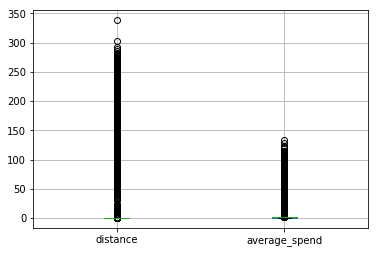

In [32]:
df_combine3.boxplot(column=['distance','average_spend'])

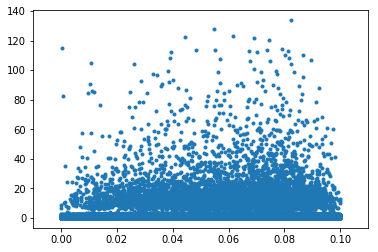

In [33]:
X = df_combine3[df_combine3.distance < 0.1].distance
Y = df_combine3[df_combine3.distance < 0.1].average_spend

plt.scatter(X,Y, marker=".")

In [34]:
df_combine3[df_combine3.distance > 0.1].shape

(5737, 17)

In [35]:
from sklearn.mixture import GaussianMixture

#dataset = df_combine3[['distance','average_spend']][df_combine3.distance<0.1].values
dataset = df_combine3[['distance','average_spend']]

gmm = GaussianMixture(n_components=3).fit(dataset).predict(dataset)

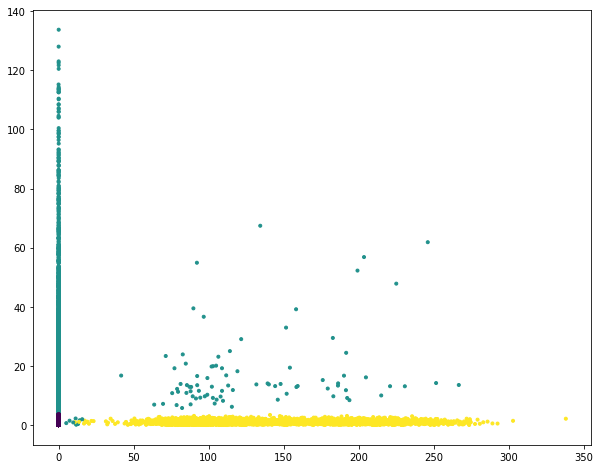

In [36]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(dataset.iloc[:, 0], dataset.iloc[:, 1], c=gmm, marker=".")

#plt.title('Estimated number of cluster: %d' % n_clusters_)
plt.show()

In [37]:
# Anormal transcation

df_combine3.iloc[gmm == 1].head()
df_combine3.iloc[gmm == 2].head()

,credit_card,city,state,zipcode,credit_card_limit,date,transaction_dollar_amount,Long,Lat,month,day,sum,Long_mean,Lat_mean,transaction_mean,distance,average_spend
108,1003715054175576,Houston,PA,15342,20000,2015-09-08 16:43:42,99.27,34.429275,24.659874,9,8,3216.21,-80.199959,40.244209,99.45,115.683762,0.998190
131,1003715054175576,Houston,PA,15342,20000,2015-09-17 19:20:37,95.20,-2.833179,34.745015,9,17,6106.67,-80.199959,40.244209,99.45,77.561974,0.957265
142,1003715054175576,Houston,PA,15342,20000,2015-09-18 21:44:21,146.75,69.475216,25.125749,9,18,7236.42,-80.199959,40.244209,99.45,150.436784,1.475616
156,1003715054175576,Houston,PA,15342,20000,2015-09-25 20:51:42,53.31,-7.373733,-11.785999,9,25,9406.58,-80.199959,40.244209,99.45,89.503082,0.536048
247,1003715054175576,Houston,PA,15342,20000,2015-10-25 00:11:25,87.77,102.032338,-32.343578,10,25,7878.05,-80.196676,40.237993,93.97,196.151722,0.934021


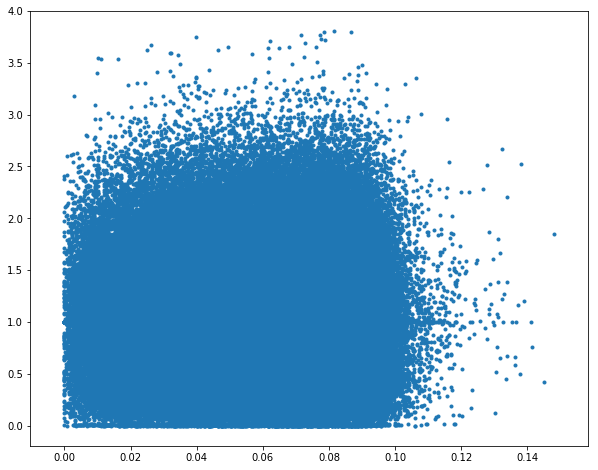

In [38]:
# This is normal

fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(dataset.iloc[:, 0][gmm == 0], dataset.iloc[:, 1][gmm==0], marker=".")
plt.show()